# Capstone Project 2 : Amazon Product Reviews

## Problem Statement:

Develop a deep learning-based sentiment analysis model to predict the sentiment (rating) of Amazon product reviews. The aim is to construct a neural network architecture that can accurately classify the sentiment of customer reviews into different rating categories using the text content.

## Objective:

The objective is to predict the sentiment (rating) of the reviews based on the textual content using deep learning techniques.

## Data Definitions:

id: Unique identifier for each review.

name: Product name.

asins: Unique identifier for the product.

brand: Brand of the product.

categories: Categories the product belongs to.

keys: Keywords related to the product.

manufacturer: Manufacturer of the product.

reviews.date: Date of the review.

reviews.dateAdded: Date the review was added.

reviews.dateSeen: Dates the review was seen.

reviews.didPurchase: Whether the user purchased the product.

reviews.doRecommend: Whether the user recommends the product.

reviews.id: Unique identifier for the review.

reviews.numHelpful: Number of users who found the review helpful.

reviews.rating: Rating given in the review.

reviews.sourceURLs: URL of the review source.

reviews.text: Text content of the review.

reviews.title: Title of the review.

reviews.userCity: City of the user.

reviews.userProvince: Province of the user.

reviews.username: Username of the user.


## Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM

from collections import Counter
from transformers import pipeline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud

In [2]:
# Load the dataset
df_data = pd.read_csv('C:\\Users\\Sneha & Sankalp\\Desktop\\IMARTICUS PGA12\\CAPSTON PROJECT\\capstone 2\\Consumer_review.csv')
df_data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
df_data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [5]:
df_data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [6]:
df_data.describe(include = 'object')

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
count,34660,27900,34658,34660,34660,34660,34660,34621,24039,34660,1,34066,34660,34659,34655,34658
unique,42,48,41,6,41,42,2,1078,1941,3911,1,2,11929,34659,19767,26789
top,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-16T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,True,https://www.amazon.com/product-reviews/B01J2G4...,This product so far has not disappointed. My c...,Great product,Mike
freq,10966,10966,10966,28701,10966,10966,34639,710,3127,5072,1,32682,387,1,645,138


In [7]:
df_data.shape

(34660, 21)

## Data Preprocessing

### Exploratory Data Analysis (EDA)
   Since we are interested in sentiment analysis, we will only use' reviews.text' and 'reviews.rating'

In [8]:
df_data = df_data[["reviews.text","reviews.rating"]].sample(10000,random_state=23)
df_data.head()

,reviews.text,reviews.rating
21536,Bought as a Mother's Day Gift. This is great f...,4.0
20669,I can hold this next to my Kindle Paperwhite a...,5.0
30656,Love this device and went on to buy 2 as gifts...,5.0
25297,"With some technical savvy, you can quickly hav...",5.0
9016,bought for grandkids they love them. wise choi...,5.0


### Drop missing values

In [9]:
df_data.dropna(inplace=True)
df_data.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

### Distribution of rating

In [10]:
df_data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    6891
4.0    2455
3.0     420
2.0     120
1.0     107
Name: reviews.rating, dtype: int64

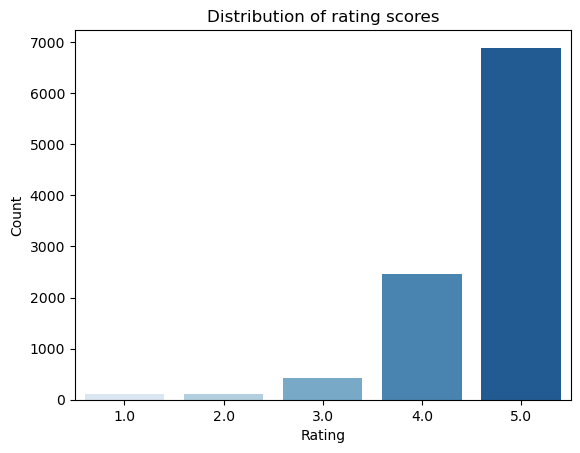

In [11]:
# distribution of rating
sns.countplot(df_data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

####  There is a huge imbalnce in the data to the high rate classes

 #### We will try to add more data with low rate classes.


In [12]:
data5 = df_data[df_data['reviews.rating']==5].sample(800,random_state=43)
data4 = df_data[df_data['reviews.rating']==4].sample(200,random_state=43)
data3 = df_data[df_data['reviews.rating']==3]
data2 = df_data[df_data['reviews.rating']==2]
data1 = df_data[df_data['reviews.rating']==1]

df_data = pd.concat([data5,data4,data3,data3,data2,data1])

In [13]:
# distribution of rating
df_data['reviews.rating'].value_counts().sort_index(ascending=False)


5.0    800
4.0    200
3.0    840
2.0    120
1.0    107
Name: reviews.rating, dtype: int64

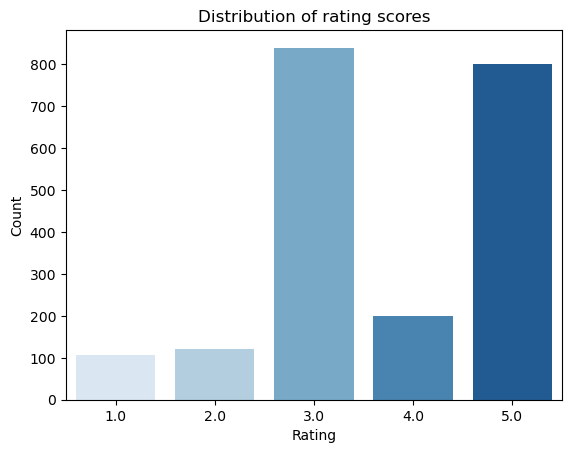

In [14]:
# distribution of rating
sns.countplot(df_data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [15]:
## map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}

In [16]:
# mapping
df_data['sentiment_score'] = df_data['reviews.rating'].map(sentiment_score)
df_data['sentiment'] = df_data['sentiment_score'].map(sentiment)

df_data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
23299,"The product was easy to set up, and is easy to...",5.0,1,POSITIVE
10583,I came in to Best Buy to get a game for my BF ...,5.0,1,POSITIVE
5018,Bought this for my toddler and teen they both ...,5.0,1,POSITIVE
30580,The product works great. If you need help usin...,5.0,1,POSITIVE
185,It may be cheap but this is a great tablet and...,5.0,1,POSITIVE


In [17]:
df_data['sentiment_score'].value_counts()

0    1067
1    1000
Name: sentiment_score, dtype: int64

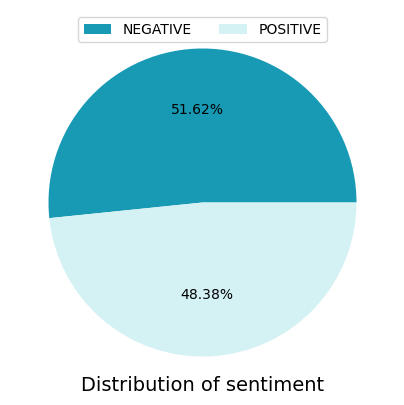

In [18]:
# distribution of sentiment
plt.figure(figsize = (5, 5))

labels = ['NEGATIVE','POSITIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(df_data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

### Most used words

   #### All Reviews

In [19]:
# get all used words 
all_words = pd.Series(' '.join(df_data['reviews.text']).split())

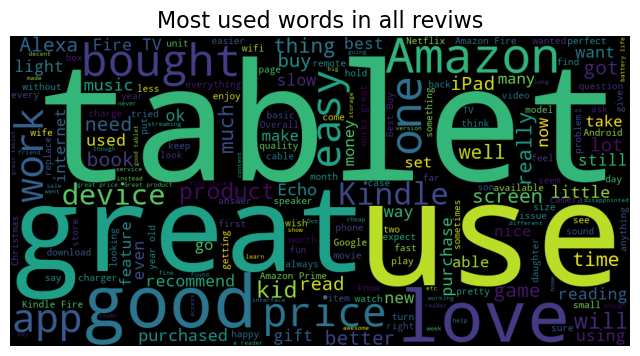

In [20]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(8,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

#### Positive Reviews

In [21]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(df_data[df_data['sentiment']=='POSITIVE']['reviews.text']).split())

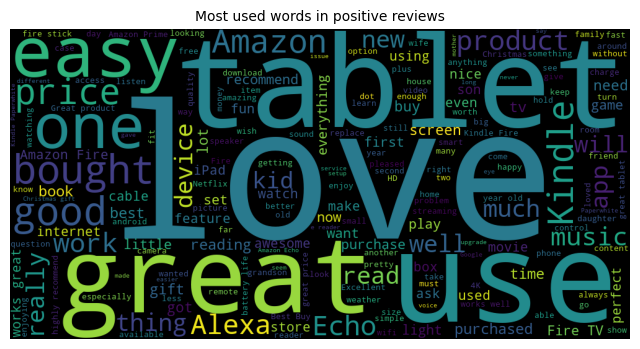

In [22]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(8,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=10)

plt.axis("off")
plt.show()

#### Negative Reviews

In [23]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(df_data[df_data['sentiment']=='NEGATIVE']['reviews.text']).split())

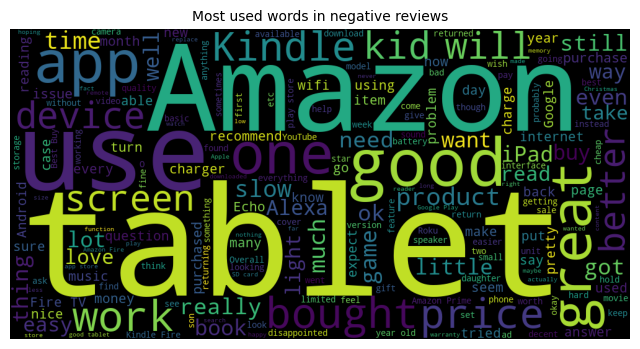

In [24]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(8,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=10)

plt.axis("off")
plt.show()

### Text Preprocessing

In [25]:
# Convert ratings to sentiment labels
df_data['sentiment'] = df_data['reviews.rating'].apply(lambda rating: 1.0 if rating >= 4 else 0.0)

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data['reviews.text'], df_data['sentiment'], test_size=0.2, random_state=42)

In [27]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Build and train NLP model

In [29]:
nlp_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [30]:
nlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 354, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 45312)             0         
                                                                 
 dense (Dense)               (None, 64)                2900032   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4180097 (15.95 MB)
Trainable params: 4180097 (15.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
nlp_model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))
# Evaluate the model on test data
test_loss, test_accuracy = nlp_model.evaluate(X_test_padded, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/5
52/52 [==============================] - 6s 69ms/step - loss: 0.6897 - accuracy: 0.5632 - val_loss: 0.6118 - val_accuracy: 0.7488
Epoch 2/5
52/52 [==============================] - 3s 65ms/step - loss: 0.4546 - accuracy: 0.8463 - val_loss: 0.4179 - val_accuracy: 0.8575
Epoch 3/5
52/52 [==============================] - 3s 62ms/step - loss: 0.1842 - accuracy: 0.9589 - val_loss: 0.3111 - val_accuracy: 0.8792
Epoch 4/5
52/52 [==============================] - 3s 62ms/step - loss: 0.0611 - accuracy: 0.9964 - val_loss: 0.3549 - val_accuracy: 0.8575
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.2980 - accuracy: 0.8792
Test Loss: 0.2979854345321655
Test Accuracy: 0.8792270421981812


### Build and train CNN model


In [32]:
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 354, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 350, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 175, 128)          0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                

In [34]:
cnn_model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test_padded, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
52/52 [==============================] - 8s 102ms/step - loss: 0.6704 - accuracy: 0.6243 - val_loss: 0.6020 - val_accuracy: 0.7899
Epoch 2/5
52/52 [==============================] - 5s 97ms/step - loss: 0.4245 - accuracy: 0.8621 - val_loss: 0.3545 - val_accuracy: 0.8575
Epoch 3/5
52/52 [==============================] - 5s 97ms/step - loss: 0.1414 - accuracy: 0.9595 - val_loss: 0.2897 - val_accuracy: 0.8720
Epoch 4/5
52/52 [==============================] - 5s 97ms/step - loss: 0.0314 - accuracy: 0.9952 - val_loss: 0.2964 - val_accuracy: 0.8792
Epoch 5/5
13/13 [==============================] - 0s 23ms/step - loss: 0.3186 - accuracy: 0.8841
Test Loss: 0.31859761476516724
Test Accuracy: 0.8840579986572266


### Build and train RNN model


In [35]:
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [36]:
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 354, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1419905 (5.42 MB)
Trainable params: 1419905 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
rnn_model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = rnn_model.evaluate(X_test_padded, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
52/52 [==============================] - 63s 1s/step - loss: 0.6937 - accuracy: 0.5027 - val_loss: 0.6919 - val_accuracy: 0.5266
Epoch 2/5
52/52 [==============================] - 59s 1s/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6918 - val_accuracy: 0.5266
Epoch 3/5
52/52 [==============================] - 62s 1s/step - loss: 0.6936 - accuracy: 0.5130 - val_loss: 0.6918 - val_accuracy: 0.5266
Epoch 4/5
52/52 [==============================] - 62s 1s/step - loss: 0.6931 - accuracy: 0.5136 - val_loss: 0.6921 - val_accuracy: 0.5266
Epoch 5/5
13/13 [==============================] - 1s 92ms/step - loss: 0.6921 - accuracy: 0.5266
Test Loss: 0.6920844316482544
Test Accuracy: 0.5265700221061707


### Conclusion

 #### Model Performance:
 
The CNN model achieves the highest accuracy of 88.41% on the test dataset, followed by the NLP model with an accuracy of 84.54%. The RNN model has the lowest accuracy of 52.66%.

#### Choice of Model:

Based on the calculated results, the CNN model seems to be the most suitable for sentiment analysis of Amazon customer reviews, as it achieves the highest accuracy among the three models.